<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

* Tree Based Ensemble Classifiers
* Sequential Feature Selection
* Feature Importance from Tree Based Algorithm
* Permutation Feature Importance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
stomp = DecisionTreeClassifier(max_depth=1)

In [5]:
ada_clf = AdaBoostClassifier(stomp)

In [6]:
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9210526315789473

In [8]:
ada_clf.feature_importances_
#Petal length and petal width are important features for determining species

array([0.  , 0.  , 0.56, 0.44])

<h2><a href="https://www.kaggle.com/spscientist/students-performance-in-exams">Student Performance Dataset</a></h2>

In [9]:
data = pd.read_csv("datasets\StudentsPerformance.csv")

In [10]:
columns = data.columns

In [11]:
data.profile_report(progress_bar=False)

In [12]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
y = data["math score"]
X = data.drop(['math score', 'reading score','writing score'], axis=1)

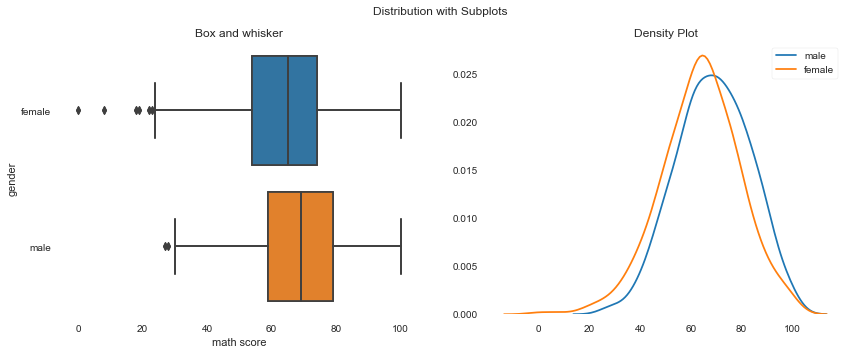

In [14]:
## fig, axs = plt.subplots(1,1,2)
plt.figure(figsize=(14, 5))
plt.suptitle("Distribution with Subplots")

plt.subplot(1,2,1)
plt.title("Box and whisker")
sns.boxplot(data["math score"], data["gender"])
sns.boxplot(data["math score"], data["gender"])

plt.subplot(1,2,2)
plt.title("Density Plot")
sns.kdeplot(data[data["gender"] == "male"]["math score"], label="male")
sns.kdeplot(data[data["gender"] == "female"]["math score"], label="female")
plt.show()

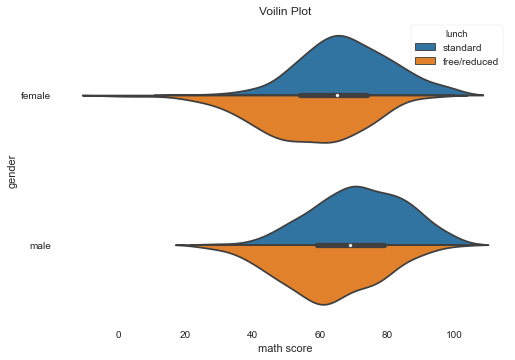

In [15]:
plt.title("Voilin Plot")
sns.violinplot(data["math score"], data["gender"], hue=data["lunch"], split=True)
plt.show()

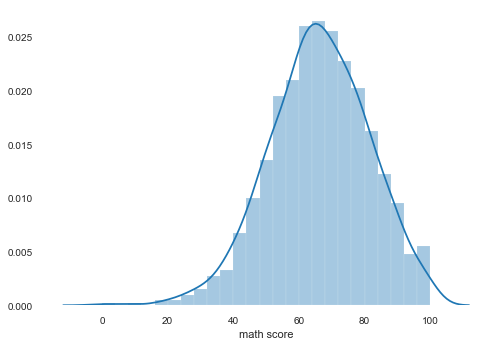

In [16]:
sns.distplot(data["math score"])
plt.show()

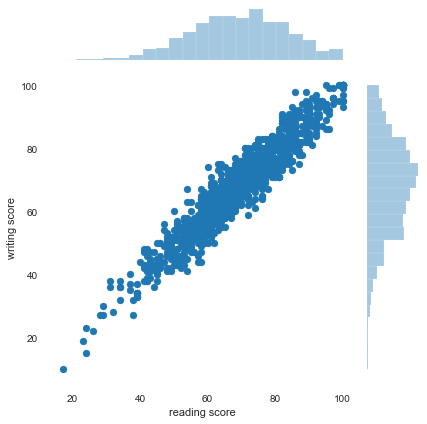

In [17]:
sns.jointplot(data["reading score"], data["writing score"], kind="scatter")
plt.show()

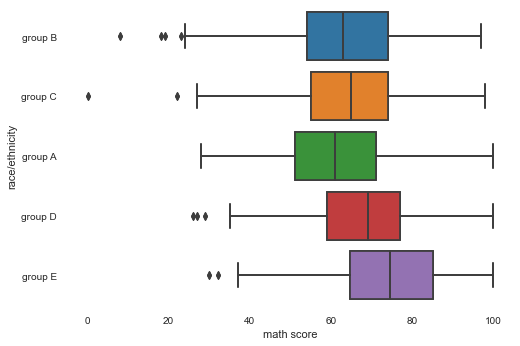

In [18]:
## fig, axs = plt.subplots(1,1,2)

sns.boxplot(data["math score"], data["race/ethnicity"])
sns.boxplot(data["math score"], data["race/ethnicity"])

plt.show()

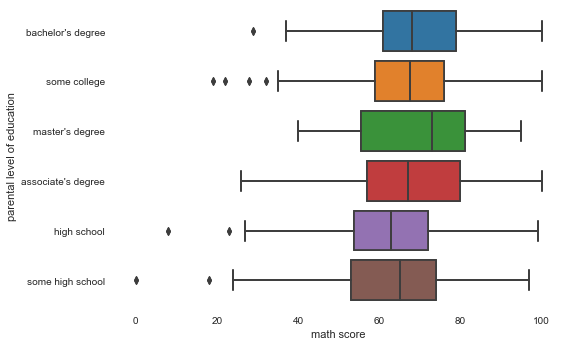

In [19]:
sns.boxplot(data["math score"], data["parental level of education"])
sns.boxplot(data["math score"], data["parental level of education"])

plt.show()

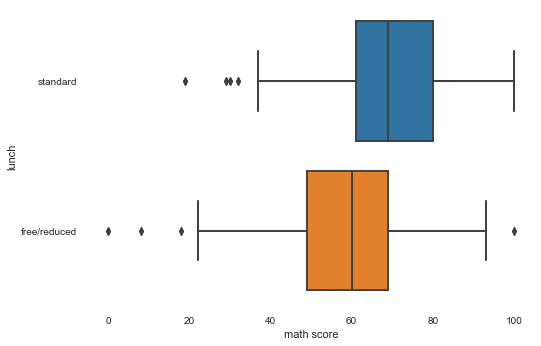

In [20]:
sns.boxplot(data["math score"], data["lunch"])
sns.boxplot(data["math score"], data["lunch"])

plt.show()

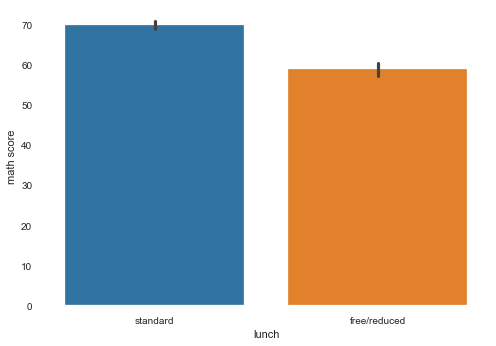

In [21]:
sns.barplot(data["lunch"], data["math score"])
plt.show()

In [22]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

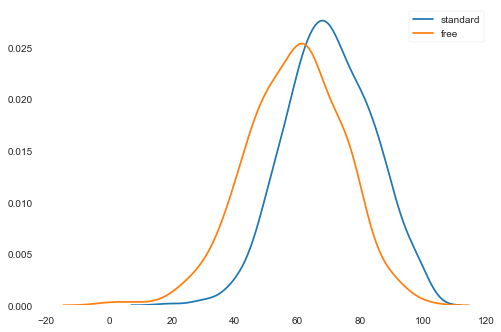

In [23]:
sns.kdeplot(data[data["lunch"] == "standard"]["math score"], label="standard")
sns.kdeplot(data[data["lunch"] == "free/reduced"]["math score"], label="free")
plt.show()

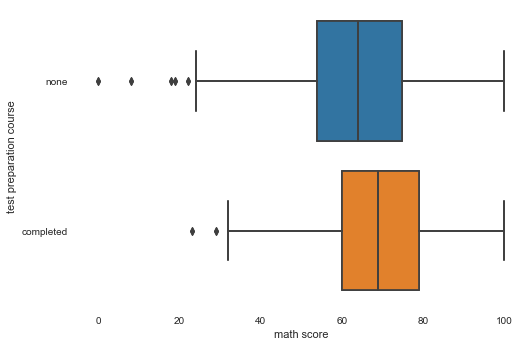

In [24]:
sns.boxplot(data["math score"], data["test preparation course"])
sns.boxplot(data["math score"], data["test preparation course"])

plt.show()

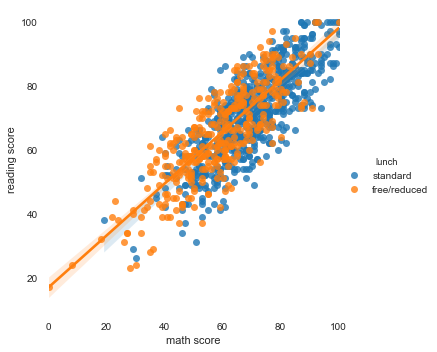

In [25]:
sns.lmplot("math score","reading score", data=data, hue="lunch")
plt.show()

In [26]:
data["score new"] = pd.cut(data["math score"],[0,35,50,70,85,100], labels=["F", "D", "C", "B", "A"])

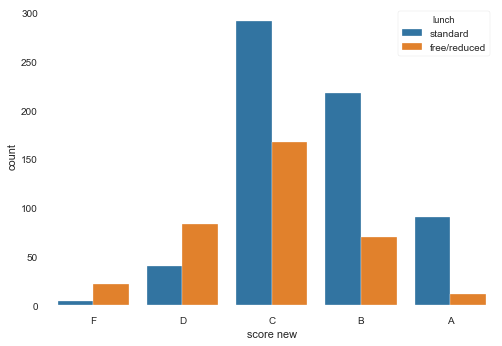

In [27]:
sns.countplot("score new", data=data, hue="lunch")
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
for col in X.columns:
    X[col] = enc.fit_transform(X[col])

In [31]:
stomp = DecisionTreeRegressor(max_depth=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
algorithms = {
                "Decision Tree":     DecisionTreeRegressor(max_depth=5),
                "Random Forest":     RandomForestRegressor(n_estimators=100),
                "AdaBoosting":       AdaBoostRegressor(stomp, n_estimators=100),
                "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
                "XGB":               XGBRegressor(n_estimators=100)
              }

mae = []
f_imp = []

In [34]:
for name,model in algorithms.items():
    print("*" * 10)
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = mean_absolute_error(y_test, y_pred)
    print("Mean Abolute Error: ", round(err, 3))
    mae.append(err)
    f_imp.append(model.feature_importances_)

**********
Decision Tree
Mean Abolute Error:  12.271
**********
Random Forest
Mean Abolute Error:  12.616
**********
AdaBoosting
Mean Abolute Error:  12.21
**********
Gradient Boosting
Mean Abolute Error:  11.661
**********
XGB
Mean Abolute Error:  12.957


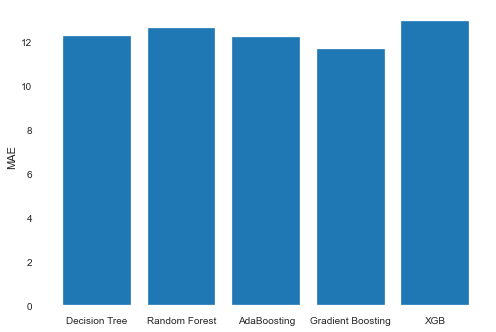

In [35]:
plt.bar(algorithms.keys(), mae)
plt.ylabel("MAE")
plt.show()

In [36]:
features = list(X.columns)

In [37]:
#Available styles 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

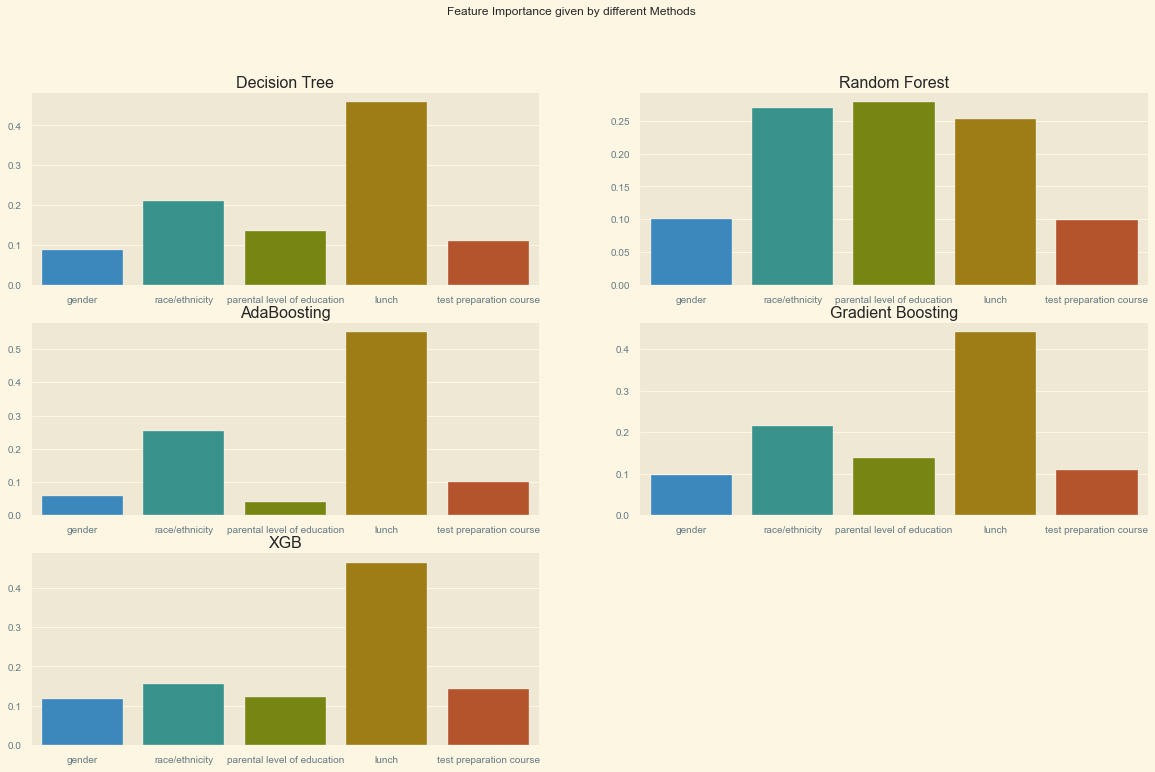

In [38]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(20, 12))
plt.suptitle("Feature Importance given by different Methods")
for index,name in enumerate(algorithms.keys()):
    plt.subplot(3,2, index+1)
    sns.barplot(features, f_imp[index], label=name)
    plt.title(name)
plt.show()

In [55]:
import eli5
from eli5.sklearn import PermutationImportance 

In [40]:
ada = AdaBoostRegressor(stomp, n_estimators=100)
ada.fit(X_train, y_train)

improtance = PermutationImportance(ada)

In [41]:
improtance.fit(X_train, y_train)

eli5.explain_weights(improtance)

Weight,Feature
0.2563 ± 0.0422,x3
0.0166 ± 0.0051,x1
0.0085 ± 0.0026,x0
0.0077 ± 0.0039,x4
0.0007 ± 0.0021,x2


In [42]:
features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection

In [44]:
sfs = SFS(ada, k_features=1, forward=False)

In [45]:
sfs.fit(X_train, y_train)

sfs.get_metric_dict()

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.16267425, 0.11412931, 0.04590055, 0.2191765 , 0.11512009]),
  'avg_score': 0.13140013707706927,
  'feature_names': ('gender',
   'race/ethnicity',
   'parental level of education',
   'lunch',
   'test preparation course'),
  'ci_bound': 0.07396011316483603,
  'std_dev': 0.05754348071037168,
  'std_err': 0.028771740355185836},
 4: {'feature_idx': (0, 1, 3, 4),
  'cv_scores': array([0.17185781, 0.11156672, 0.03415875, 0.20039192, 0.12752404]),
  'avg_score': 0.12909984616660594,
  'feature_names': ('gender',
   'race/ethnicity',
   'lunch',
   'test preparation course'),
  'ci_bound': 0.07323792307747602,
  'std_dev': 0.0569815922872347,
  'std_err': 0.02849079614361735},
 3: {'feature_idx': (1, 3, 4),
  'cv_scores': array([0.15880282, 0.11898551, 0.03345149, 0.20378281, 0.12684455]),
  'avg_score': 0.12837343619649452,
  'feature_names': ('race/ethnicity', 'lunch', 'test preparation course'),
  'ci_bound': 0.07205237764128457

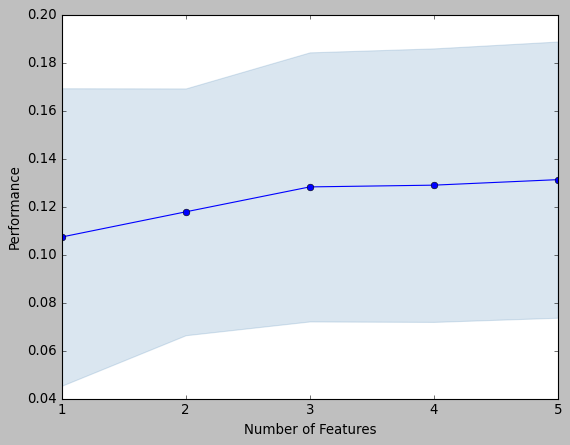

In [46]:
plt.style.use("classic")
plot_sequential_feature_selection(sfs.get_metric_dict())
plt.show()

In [47]:
data = pd.read_csv("datasets/bike_share.csv")

In [48]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [49]:
data["datetime"] = pd.DatetimeIndex(data["datetime"])

In [50]:
data["weekday"] = [x.weekday() for x in data["datetime"]]

In [51]:
data["hour"] = [x.hour for x in data["datetime"]]

In [52]:
data["season"] = pd.Categorical(data["season"])

In [53]:
data["weather"] = pd.Categorical(data["weather"])

In [54]:
data.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
weekday                int64
hour                   int64
dtype: object